In [86]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [87]:
# 读取数据
df_original = pd.DataFrame(pd.read_excel('personalroadriskassessv2.xlsx'))
df_original.head(5)

df_test_original = pd.DataFrame(pd.read_excel('personalroadriskassessv2test.xlsx'))
df_test_original.head(5)

,id,ZJCX,LJJF,xb,jl,HPZL,WFJFS,WFSJ,hnum,age,child,marrige,whcd,cllx,cpid,SFSG
0,108945,5.0,9,1.0,0.0,NaN,NaN,NaN,0,50,0,0,NaN,NaN,NaN,0
1,108946,5.0,0,2.0,0.0,NaN,NaN,NaN,0,26,0,0,NaN,NaN,NaN,0
2,108947,5.0,0,1.0,0.0,NaN,NaN,NaN,0,25,0,0,NaN,NaN,NaN,0
3,108948,5.0,0,1.0,0.0,NaN,NaN,NaN,0,33,0,0,NaN,NaN,NaN,0
4,108949,5.0,0,1.0,0.0,NaN,NaN,NaN,0,22,0,0,NaN,NaN,NaN,0


In [88]:
# 数据处理
# 驾龄空值用平均值取代
df_original['jl'] = df_original['jl'].fillna(df_original['jl'].mean())
df_original['xb'] = df_original['xb'].fillna(method='ffill')
df_original['WFJFS'] = df_original['WFJFS'].fillna(0)

df_test_original['jl'] = df_test_original['jl'].fillna(df_test_original['jl'].mean())
df_test_original['xb'] = df_test_original['xb'].fillna(method='ffill')
df_test_original['WFJFS'] = df_test_original['WFJFS'].fillna(0)

# 移除列
df = df_original.drop(['WFSJ'],1)
df_test = df_test_original.drop(['WFSJ'],1)

In [89]:
# 打印 df 信息
print(df.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9625 entries, 0 to 9624
Data columns (total 15 columns):
id         9625 non-null int64
ZJCX       9625 non-null float64
LJJF       9625 non-null int64
xb         9625 non-null float64
jl         9625 non-null float64
HPZL       193 non-null float64
WFJFS      9625 non-null float64
hnum       9625 non-null int64
age        9625 non-null int64
child      9625 non-null int64
marrige    9625 non-null int64
WHCD       283 non-null float64
CLLX       2705 non-null float64
cpid       2707 non-null float64
SFSG       9625 non-null int64
dtypes: float64(8), int64(7)
memory usage: 1.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 15 columns):
id         2205 non-null int64
ZJCX       2205 non-null float64
LJJF       2205 non-null int64
xb         2205 non-null float64
jl         2205 non-null float64
HPZL       31 non-null float64
WFJFS      2205 non-null float64
hnum       2205 non-null in

In [90]:
# df.head(5)

In [91]:
part_df = df[[
    'ZJCX', 'LJJF', 'xb', 'jl',  'marrige', 'child', 'hnum',
    'age' ,'WFJFS', 'SFSG'
]]

part_df_test = df_test[[
    'ZJCX', 'LJJF', 'xb', 'jl',  'marrige', 'child', 'hnum',
    'age' ,'WFJFS', 'SFSG'
]]



# label_df = df[['SFSG']]
# print('type(part_df)',type(part_df))
# print('type(df)',type(df)) 
# df.head(2)

# print('type(part_df)',type(part_df))
# print('part_df.shape',part_df.shape)

In [92]:
corr_matrix = part_df.corr()
corr_matrix['SFSG'].sort_values(ascending=False)

SFSG       1.000000
child      0.870793
age        0.593849
jl         0.584937
hnum       0.382204
ZJCX       0.343317
LJJF       0.179828
marrige    0.169450
WFJFS      0.122853
xb        -0.336699
Name: SFSG, dtype: float64

In [93]:
# 特征处理
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from numpy import vstack, array, nan
from scipy.stats import pearsonr
from minepy import MINE

k = 3

skb_x = part_df.drop(['SFSG'], 1)
skb_y = part_df['SFSG']
print(skb_x.head(5))
# 卡方检验
df_KB_kf = SelectKBest(chi2, k=k).fit(skb_x, skb_y)
# print(type(df_KB.get_support(indices=True)))
df_KB.fit_transform(skb_x, skb_y)
print('df_KB',df_KB.get_support(indices=False))
print('df_KB',df_KB.get_support(indices=True))

# 相关系数法
df_KB_xgxs = SelectKBest(lambda X, Y: array(list(map(lambda x:pearsonr(x, Y), X.T))).T[0], k=k).fit(skb_x, skb_y)
df_KB_xgxs.fit_transform(skb_x, skb_y)
print('df_KB_xgxs',df_KB_xgxs.get_support(indices=False))
print('df_KB_xgxs',df_KB_xgxs.get_support(indices=True))


# 互信息法
#由于MINE的设计不是函数式的，定义mic方法将其为函数式的，返回一个二元组，二元组的第2项设置成固定的P值0.5
def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    return (m.mic(), 0.5)

df_KB_hxx = SelectKBest(lambda X, Y: array(list(map(lambda x:mic(x, Y), X.T))).T[0], k=k).fit(skb_x, skb_y)
df_KB_hxx.fit_transform(skb_x, skb_y)
print('df_KB_hxx',df_KB_hxx.get_support(indices=False))
print('df_KB_hxx',df_KB_hxx.get_support(indices=True))
# SelectKBest(lambda X,Y:np.array(list(map(lambda x:pearsonr(x, Y), X.T))).T[0], k=2).fit_transform(skb_x, skb_y)


   ZJCX  LJJF   xb   jl  marrige  child  hnum  age  WFJFS
0   5.0     0  1.0  1.0        0      0     0   43    0.0
1   5.0     3  1.0  1.0        0      0     0   37    0.0
2   5.0     2  1.0  1.0        0      0     0   25    0.0
3   5.0     0  2.0  1.0        0      0     0   42    0.0
4   5.0     0  2.0  1.0        0      0     0   42    0.0
df_KB [False False False  True False  True False  True False]
df_KB [3 5 7]
df_KB_xgxs [False False False  True False  True False  True False]
df_KB_xgxs [3 5 7]
df_KB_hxx [False False False  True False  True False  True False]
df_KB_hxx [3 5 7]


In [94]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
 
#递归特征消除法，返回特征选择后的数据|
#参数estimator为基模型
#参数n_features_to_select为选择的特征个数
df_rfe = RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=3).fit(skb_x, skb_y)
df_rfe.fit_transform(skb_x, skb_y)
print('df_rfe',df_rfe.get_support(indices=False))
print('df_rfe',df_rfe.get_support(indices=True))
print('df_rfe',df_rfe.ranking_)

# ##输出选择后的特征
# def featureTop(feature_array,rank_array,TopK):
#     indexTop=rank_array[0:TopK]
#     re=[]
#     for i in range(feature_array.shape[0]):
#         t=feature_array[i][list(indexTop)]
#         re.append(list(t))
#     return np.array(re)

# tm=featureTop(skb_x,df_rfe.ranking_,5)


df_rfe [False False  True False False  True  True False False]
df_rfe [2 5 6]
df_rfe [4 5 1 3 2 1 1 7 6]


In [96]:
# from sklearn.svm import SVC
# from sklearn.datasets import load_digits
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import StratifiedKFold

# svc = SVC(kernel="linear", C=1)
# ##estimator模型，step每次迭代时删除的（整数）特征数，cv交叉验证(可为整数cv=3)，scoring评估函数
# rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(skb_y, 2), scoring='accuracy')
# rfecv.fit(skb_x, skb_y)
# #查看每列是否选中
# rfecv.support_ 
# ##查看特征的排序
# rfecv.ranking_
# ##交叉验证的成绩
# rfecv.grid_scores_ 


In [97]:
# 随机稀疏模型(Randomized sparse models) 0.19 已弃用
from sklearn.linear_model import RandomizedLogisticRegression
randomized_logistic = RandomizedLogisticRegression().fit(skb_x, skb_y)
randomized_logistic.scores_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


array([1.   , 0.46 , 0.885, 1.   , 0.075, 1.   , 1.   , 0.965, 0.1  ])

In [98]:
# RFECV 1
iris = load_iris()
X = iris.data
y = iris.target
estimator = LinearSVC()
selector = RFECV(estimator=estimator, cv=3)
selector.fit(skb_x, skb_y)
print("N_features %s" % selector.n_features_)
print("Support is %s" % selector.support_)
print("Ranking %s" % selector.ranking_)
print("Grid Scores %s" % selector.grid_scores_)


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


N_features 7
Support is [ True False  True  True  True  True  True False  True]
Ranking [1 2 1 1 1 1 1 3 1]
Grid Scores [0.93849702 0.93569241 0.93673115 0.94202895 0.94462607 0.94545707
 0.94680744 0.88614478 0.92322922]


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Optimal number of features : 7
Ranking of features : [1 1 1 1 1 1 1 2 3]


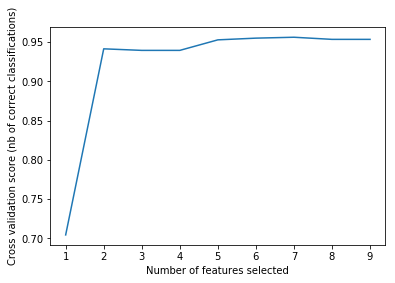

In [99]:
# RFECV 2
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(skb_x, skb_y)

print("Optimal number of features : %d" % rfecv.n_features_)
print("Ranking of features : %s" % rfecv.ranking_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
# 通过RFECV我们得知，原来9个特征都需要
# 同时这也向我们展示了RFECV的强大潜力

In [84]:
# 三个特殊的多类比较特征选择
# 假阳性率（false positive rate） SelectFpr

# 伪发现率（false discovery rate） SelectFdr

# 或者族系误差（family wise error） SelectFwe

from sklearn.feature_selection import SelectFdr,f_classif,SelectFpr,SelectFwe,chi2,mutual_info_classif


selector1 = SelectFpr(score_func = mutual_info_classif,alpha=0.5)
# alpha是预期错误发现率的上限,默认是0.5,score_func 默认为 f_classif
selector1.fit(skb_x, skb_y)
print("\nScores of features %s" % selector1.scores_)
print("p-values of feature scores is %s" % selector1.pvalues_)
# print("Shape after transform is ",selector1.transform(X).shape)


selector2 = SelectFdr(score_func = f_classif,alpha=4.37695696e-80) # alpha是预期错误发现率的上限
selector2.fit(skb_x, skb_y)
print("\nScores of features %s" % selector2.scores_)
print("p-values of feature scores is %s" % selector2.pvalues_)
print("Shape after transform is ",selector2.transform(skb_x).shape)

selector3 = SelectFwe(score_func = chi2,alpha=1) # alpha是预期错误发现率的上限
selector3.fit(skb_x, skb_y)
print("\nScores of features %s" % selector3.scores_)
print("p-values of feature scores is %s" % selector3.pvalues_)
print("Shape after transform is ",selector3.transform(skb_x).shape)



Scores of features [0.20536967 0.02214124 0.04940274 0.38350163 0.01151801 0.12358721
 0.         0.23518946 0.00092893]
p-values of feature scores is None

Scores of features [1.41828452e+03 2.91593660e+02 1.11017334e+03 4.95106188e+03
 1.45835340e+02 3.04256235e+03 7.77860833e-01 6.27050093e+03
 1.07246113e+02]
p-values of feature scores is [1.18853716e-289 1.97994886e-064 1.81447193e-230 0.00000000e+000
 2.45629682e-033 0.00000000e+000 3.77818213e-001 0.00000000e+000
 5.31950321e-025]
Shape after transform is  (9620, 5)

Scores of features [1.39052019e+03 2.25747231e+03 1.64432322e+02 1.12435448e+04
 1.40729593e+02 1.80262611e+03 7.76018810e-01 1.50047686e+04
 1.26138087e+03]
p-values of feature scores is [2.41222289e-304 0.00000000e+000 1.21708028e-037 0.00000000e+000
 1.84361994e-032 0.00000000e+000 3.78361501e-001 0.00000000e+000
 2.79124770e-276]
Shape after transform is  (9620, 8)


In [85]:
# 可以使用一个可配置的策略来进行单变量特征选择
from sklearn.feature_selection import GenericUnivariateSelect

estimator = LinearSVC()
selector = GenericUnivariateSelect(score_func=f_classif,mode='fpr',param= 0.5)
# mode : {'percentile', 'k_best', 'fpr', 'fdr', 'fwe'}
selector.fit(skb_x, skb_y)
print("\nScores of features %s" % selector.scores_)
print("p-values of feature scores is %s" % selector.pvalues_)
print("Shape after transform is ",selector.transform(skb_x).shape)
print("Support is ",selector.get_support())
print("Params is ",selector.get_params())



Scores of features [1.41828452e+03 2.91593660e+02 1.11017334e+03 4.95106188e+03
 1.45835340e+02 3.04256235e+03 7.77860833e-01 6.27050093e+03
 1.07246113e+02]
p-values of feature scores is [1.18853716e-289 1.97994886e-064 1.81447193e-230 0.00000000e+000
 2.45629682e-033 0.00000000e+000 3.77818213e-001 0.00000000e+000
 5.31950321e-025]
Shape after transform is  (9620, 9)
Support is  [ True  True  True  True  True  True  True  True  True]
Params is  {'mode': 'fpr', 'param': 0.5, 'score_func': <function f_classif at 0x1a30558840>}


In [55]:
from sklearn.feature_selection import SelectFromModel

#带L1惩罚项的逻辑回归作为基模型的特征选择
df_lr = SelectFromModel(LogisticRegression(penalty="l1", C=0.1, solver='liblinear')).fit_transform(skb_x, skb_y)
print(df_lr)

[[ 5.   6.   1.  ...  0.  36.   0. ]
 [ 5.   6.   1.  ...  0.  41.   0. ]
 [13.   0.   1.  ...  0.  40.  12. ]
 ...
 [ 5.   0.   1.  ...  0.  32.   0. ]
 [ 5.   0.   2.  ...  0.  30.   0. ]
 [ 4.5  0.   2.  ...  0.  23.   0. ]]


In [59]:
# 基于树模型的特征选择法
from sklearn.ensemble import GradientBoostingClassifier

#GBDT作为基模型的特征选择
df_gbdt = SelectFromModel(GradientBoostingClassifier()).fit_transform(skb_x, skb_y)
print(df_gbdt)

[[ 5.          8.        ]
 [ 5.          0.        ]
 [13.          2.09237996]
 ...
 [ 5.          0.        ]
 [ 5.          0.        ]
 [ 4.5         0.        ]]


In [64]:
# PCA
from sklearn.decomposition import PCA

#主成分分析法，返回降维后的数据
#参数n_components为主成分数目
print(PCA(n_components=3).fit_transform(skb_x))

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#线性判别分析法，返回降维后的数据
#参数n_components为降维后的维数
print(LDA(n_components=3).fit_transform(skb_x, skb_y))

[[  1.2260992    5.45434605   2.5621658 ]
 [  5.38118524   4.08441644  -3.08037117]
 [  4.99579959  -0.64669984   5.2913401 ]
 ...
 [ -3.65284304  -1.52577392  -1.32728024]
 [ -5.64836016  -1.46752726  -1.14237928]
 [-12.6263633   -1.25005497  -0.78030276]]
[[ 1.70302958]
 [ 0.07611805]
 [ 1.93278774]
 ...
 [-0.84896254]
 [-1.44814716]
 [-1.9296405 ]]


In [52]:
#用 sklearn  分割训练集和测试集
train_df, verify_df = train_test_split(part_df, test_size = 0.3)
# print('type(part_df)',type(part_df))
# print('type(train_df)',type(train_df)) 
# print('type(verify_df)',type(verify_df)) 

In [53]:
# 读取需要的数据转换成 np
#    'CLLX', 'marrige', 'hnum',
# 选择参数列
X_select_elements = ['LJJF','ZJCX', 'age', 'xb', 'jl', 'child', 'marrige','WFJFS']
Y_select_elements = 'SFSG'

# 训练数据
train_X = np.array(train_df[X_select_elements])
train_Y = np.array(train_df[Y_select_elements])

# 验证数据
verify_X = np.array(verify_df[X_select_elements])
verify_Y = np.array(verify_df[Y_select_elements])

# 测试数据
test_X = np.array(part_df_test[X_select_elements])

print('train_X.shape',train_X.shape)
print('verify_X.shape',verify_X.shape)
print('test_X.shape',test_X.shape)

train_X.shape (6734, 7)
verify_X.shape (2886, 7)
test_X.shape (2205, 7)


In [54]:
# 均值化
from sklearn.preprocessing import MinMaxScaler

minMax = MinMaxScaler()
train_X = minMax.fit_transform(train_X)
verify_X = minMax.fit_transform(verify_X)
test_X = minMax.fit_transform(test_X)


In [12]:
# train_X_tansor = tf.convert_to_tensor(train_X)
# train_Y_tansor = tf.convert_to_tensor(train_Y)
# verify_X_tansor = tf.convert_to_tensor(verify_X)
# verify_Y_tansor = tf.convert_to_tensor(verify_Y)

In [13]:
# with tf.Session() as sess:
#     sess.run(train_X_tansor)
#     sess.run(train_Y_tansor)
#     sess.run(verify_X_tansor)
#     sess.run(verify_Y_tansor)
#     print(train_X_tansor)
#     print(train_Y_tansor)
#     print(verify_X_tansor)
#     print(verify_Y_tansor)

In [55]:
# 独热编码
train_Y_oh = (np.arange(2) == train_Y[:,None]).astype(np.float32)
verify_Y_oh = (np.arange(2) == verify_Y[:,None]).astype(np.float32)
print(train_Y_oh)

# 二值化
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train_Y_lb = lb.fit_transform(train_Y)
verify_Y_lb = lb.fit_transform(verify_Y)

print(train_Y_lb)
print(train_Y_lb.shape)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
(6734, 1)


In [56]:
# 公用 shape 参数
xs1 = train_X.shape[1]
ys1 = train_Y_oh.shape[1]

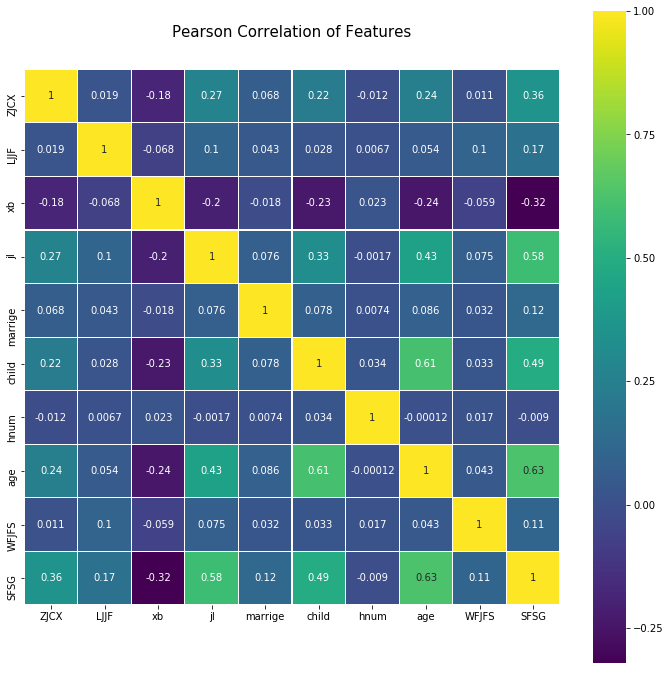

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

#  'ZJCX', 'LJJF', 'xb', 'jl', 'CLLX', 'marrige', 'child', 'hnum',
#     'age', 'XZQH','SSRS','SWRS7','sghpzl'

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(part_df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, xticklabels=True, yticklabels=True)
plt.show()